In [2]:
from pylab import *

Capacitor e resistor paralelo

$Z = \frac{R}{sRC+1}$

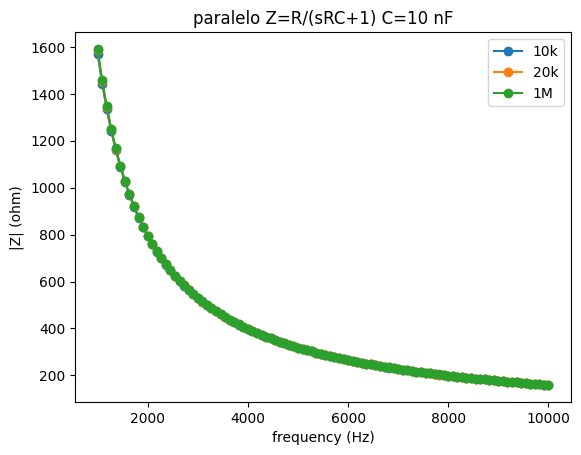

In [ ]:
C = 100e-9  # 10 nF
#R = 10e9  # 1 M ohms
RR = [1e4, 2e4, 1e9]
RRL = ['10k', '20k', '1M']

Fmax=10e3  # 1MHz

N=100 # numero de pontos
Z=zeros(N,dtype=complex)
F=linspace(1000,Fmax,N)
s=2j*pi*F
ZZ= [R / (s*R*C+1)  for R in RR]


for Z,RL in zip(ZZ,RRL):
    plot(F,abs(Z),'o-',label=RL)
legend()
title('paralelo Z=R/(sRC+1) C=10 nF')
xlabel('frequency (Hz)')
ylabel('|Z| (ohm)')
show()
# plot(Z.real, Z.imag,'o-')
# show()

Capacitor e resistor série

$Z = R+(sC)^{-1}$

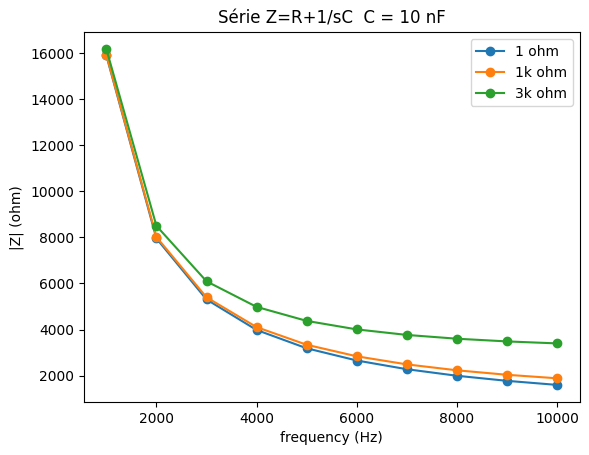

In [ ]:
C = 10e-9  # 100 nF
RR = [1, 1e3, 3e3]
RRL = ['1 ohm', '1k ohm', '3k ohm']

Fmax=10e3  # 1MHz
N=10 # numero de pontos
F=linspace(1000,Fmax,N)
s=2j*pi*F
ZZ= [R + (s*C)**(-1)  for R in RR]


for Z,RL in zip(ZZ,RRL):
    plot(F,abs(Z),'o-',label=RL)
legend()
title('Série Z=R+1/sC  C = 10 nF' )
xlabel('frequency (Hz)')
ylabel('|Z| (ohm)')
show()
# plot(Z.real, Z.imag)
# show()

Resistor Rs série com Resistor Rc paralelo com C

$Z = R_s+\frac{R_p}{sR_pC+1}$

Ver tambem https://en.wikipedia.org/wiki/Randles_circuit

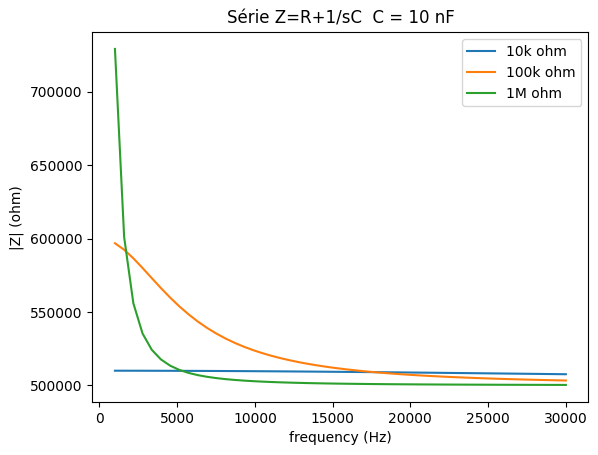

In [ ]:
# configuração igual Raiff Fosenca

C = 300e-12  # 300 pF
Rs=500e3  # 500 kOhms

RR = [1e4, 1e5, 1e9]
RRL = ['10k ohm', '100k ohm', '1M ohm']
Fmax=30e3  # 1MHz
N=50 # numero de pontos
F=linspace(1000,Fmax,N)
s=2j*pi*F
ZZ= [Rs + R / (s*R*C+1)  for R in RR]

for Z,RL in zip(ZZ,RRL):
    plot(F,abs(Z),'-',label=RL)
legend()
title('Série Z=R+1/sC  C = 10 nF' )
xlabel('frequency (Hz)')
ylabel('|Z| (ohm)')
show()

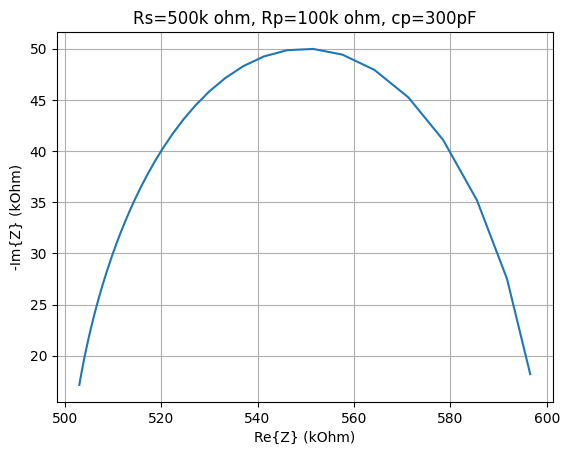

In [ ]:
plot(ZZ[1].real/1000, -ZZ[1].imag/1000,'-')
xlabel('Re{Z} (kOhm)')
ylabel('-Im{Z} (kOhm)')
title('Rs=500k ohm, Rp=100k ohm, cp=300pF')
grid()
show()

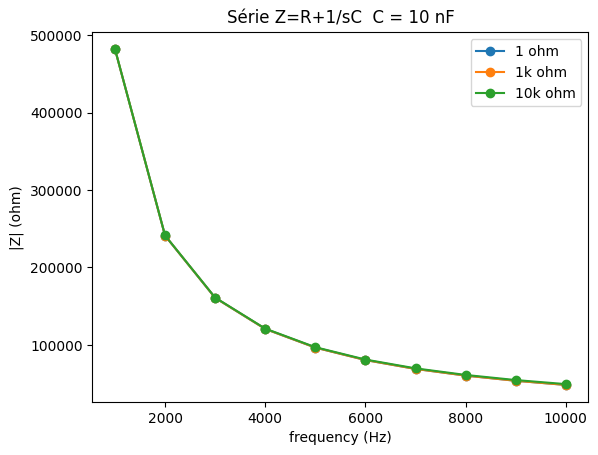

In [ ]:
# resistor em serie 10k (Carlos)

C = 330e-12  # 330 pF
RR = [1, 1e3, 1e4]
RRL = ['1 ohm', '1k ohm', '10k ohm']

Fmax=10e3  # 1MHz
N=10 # numero de pontos
F=linspace(1000,Fmax,N)
s=2j*pi*F
ZZ= [R + (s*C)**(-1)  for R in RR]


for Z,RL in zip(ZZ,RRL):
    plot(F,abs(Z),'o-',label=RL)
legend()
title('Série Z=R+1/sC  C = 10 nF' )
xlabel('frequency (Hz)')
ylabel('|Z| (ohm)')
show()
# plot(Z.real, Z.imag)
# show()

In [ ]:
######################
#Calculo de Vsense (Divisor de impedância)
from pylab import *
f= 976
C = 45E-9
Rsense = 1.7E3
W = 2 * pi * f
reatC = 1/(1j*W*C)
Vin=1
Vsense = reatC/(Rsense+reatC) * Vin
print("Real=", Vsense.real, "| Imag=", Vsense.imag)

Real= 0.8196178188820873 | Imag= -0.38450546140862185


## Trajetoria da tensão medida (Vsense), em função do Rsense

Deve-se escolher Rsense de modo evitar Vsense próximo de 0 ou 1 <br>
pois o cálculo é<br>
Z = Rsense.Vsense / (Vsense-Vin) e Vin=1 <br>
Então o numerador, nem o denominador devem ser próximos de zero.

Sendo Sensor = Z = reatância capacitica = 1/sC  (supondo idealmente capacitivo)<br>
pelo divisor resistivo tem-se<br>
Vsense = Z /(Z+1/sC)


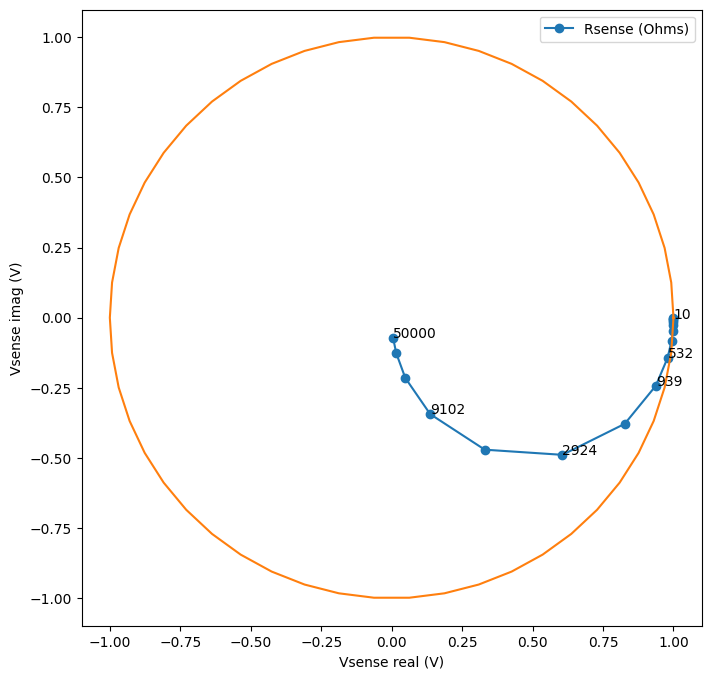

In [ ]:
# trajetoria da tensão medida, em função do Rsense
#
# Deve-se escolher Rsense de modo evitar Vsense~0 ou Vsense~1
# pois Z = Rsense.Vsense / (Vsense-Vin) e Vin=1
# pois
# Sensor = Z = reatC = 1/sC  (supondo idealmente capacitivo)
# Divisor resistivo
# Vsense = Z /(Z+1/sC)

N=16
M1=int(N/2)-1
M2=int(N/2)
M3=int(3*N/4)-2
M4=int(3*N/4)
M5=N-1
Rsense=geomspace(10,50000, num=N)
Vsense=reatC/(Rsense+reatC)
figure(figsize=(8,8))
plot(Vsense.real, Vsense.imag,'o-',label='Rsense (Ohms)')
text(Vsense[0].real,Vsense[0].imag,str(int(Rsense[0])))
text(Vsense[M1].real,Vsense[M1].imag,str(int(Rsense[M1])))
text(Vsense[M2].real,Vsense[M2].imag,str(int(Rsense[M2])))
text(Vsense[M3].real,Vsense[M3].imag,str(int(Rsense[M3])))
text(Vsense[M4].real,Vsense[M4].imag,str(int(Rsense[M4])))
text(Vsense[M5].real,Vsense[M5].imag,str(int(Rsense[M5])))
teta=arange(51)/50*2*pi
plot(cos(teta),sin(teta))
xlabel('Vsense real (V)')
ylabel('Vsense imag (V)')
legend()
show()

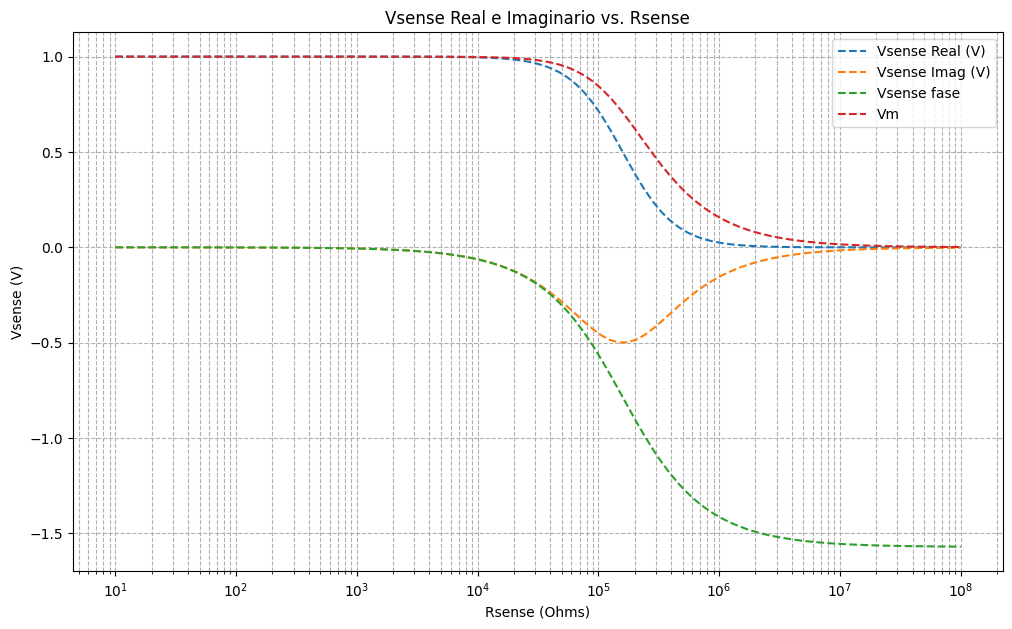

In [ ]:
f = 1000
C = 1E-9
W = 2 * pi * f
reatC = 1/(1j * W * C) # Reatancia capacitiva

N = 100 # quantidade de pontos do grafico
Rsense = geomspace(10, 100000000, num=N) # gerando as resistencias em cresciento logaritmico

Vsense = reatC / (Rsense + reatC) # Calculo de Vsense
Vsensefase = angle(Vsense)
Vm = abs(Vsense)

figure(figsize=(12, 7))

plot(Rsense, Vsense.real, label='Vsense Real (V)',linestyle='--')
plot(Rsense, Vsense.imag, label='Vsense Imag (V)', linestyle='--')
plot(Rsense, Vsensefase, label ="Vsense fase",linestyle='--')
plot(Rsense, Vm, label ="Vm",linestyle='--')
xscale('log')
xlabel('Rsense (Ohms)')
xlabel('Rsense (Ohms)')
ylabel('Vsense (V)')
title('Vsense Real e Imaginario vs. Rsense')
legend()
grid(True, which="both", linestyle='--')
show()

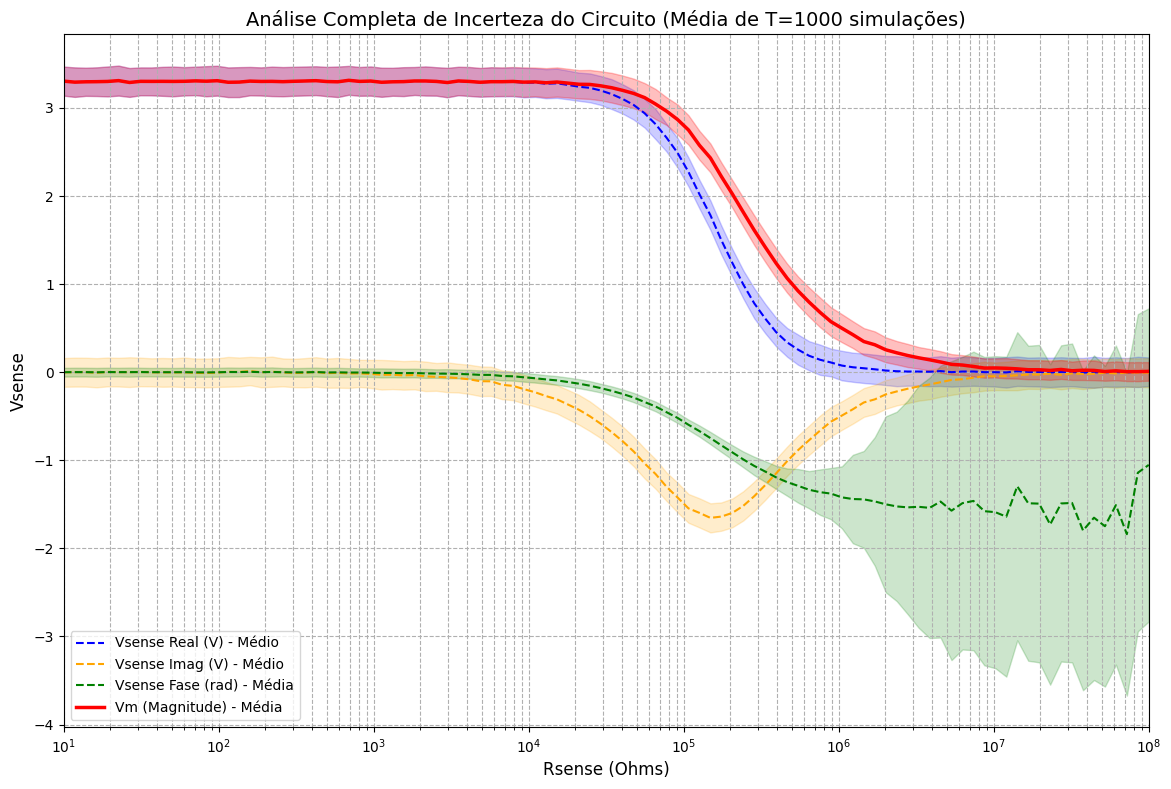

In [ ]:
f = 1000  # Frequência do sinal em Hz
C = 1E-9  # Capacitância em Farads (1 nF)
W = 2 * np.pi * f  # Frequência angular (rad/s)
reatC = 1 / (1j * W * C)  # Impedância (reatância) complexa do capacitor
Vin = 3.3
Z_teo = 1 / (1j*2* pi* f* C)

N = 100  # Quantidade de pontos no gráfico
Rsense = np.geomspace(10, 100000000, num=N)  # Gera N resistências de 10Ω a 1MΩ em escala logarítmica


noise_std_dev = 0.05 * Vin # ruído Gaussiano adicionado
T = 1000  # Número de simulações para fazer a média (aumente para mais precisão)

# Lista para armazenar os resultados de cada uma das 'T' simulações
all_vsense_results = []
all_Z_results =[]

# Loop que executa a simulação T vezes
for i in range(T):

    vsense_com_ruido = Vin * reatC / (Rsense + reatC) + np.random.normal(0, noise_std_dev, N) + 1j* np.random.normal(0, noise_std_dev, N)
    Z_com_ruido = (Rsense*vsense_com_ruido)/(Vin - vsense_com_ruido)
    # Adiciona o resultado da simulação atual à nossa lista
    all_vsense_results.append(vsense_com_ruido)
    all_Z_results.append(Z_com_ruido)

# A média é calculada no eixo 0, que corresponde a agregar os resultados das T simulações
# para cada um dos N pontos de Rsense.
Vsense_medio = np.mean(all_vsense_results, axis=0)
Z_medio = np.mean(all_Z_results, axis=0)


# Extração dos valores médios para plotagem
Vm_medio = np.abs(Vsense_medio)
VsenseReal_medio = np.real(Vsense_medio)
VsenseImag_medio = np.imag(Vsense_medio)
VsenseFase_media = np.angle(Vsense_medio)

# Extração dos valores médios  de Z para plotagem
Z_medio_modulo = np.abs(Z_medio)
ZReal_medio = np.real(Z_medio)
ZImag_medio = np.imag(Z_medio)
ZFase_media = np.angle(Z_medio)

# Cálculo do desvio padrão para cada grandeza (representa a incerteza)
vm_std_dev = np.std(np.abs(all_vsense_results), axis=0)
real_std_dev = np.std(np.real(all_vsense_results), axis=0)
imag_std_dev = np.std(np.imag(all_vsense_results), axis=0)
fase_std_dev = np.std(np.angle(all_vsense_results), axis=0)

# Cálculo do desvio padrão de Z para cada grandeza (representa a incerteza)
Z_std_dev = np.std(np.abs(all_Z_results), axis=0)
Zreal_std_dev = np.std(np.real(all_Z_results), axis=0)
Zimag_std_dev = np.std(np.imag(all_Z_results), axis=0)
Zfase_std_dev = np.std(np.angle(all_Z_results), axis=0)


plt.figure(figsize=(14, 9))

rsense_experimental = [10000,56000,82000,150000,390000,680000,820000,1000000,10000000]
Vfase_media_experimental = [4095.00,3688.91,2963.10,2103.01,586.96,242.65,174.59,126.68,8.75]
Vfase_dp_experimental = [0.00,6.72,7.53,3.13,2.92,4.86,3.88,5.99,5.66]

"""
plt.errorbar(
    rsense_experimental,
    Vfase_media_experimental,
    yerr=Vfase_dp_experimental, # Define o tamanho das barras de erro
    fmt='o',                          # 'o' para pontos circulares, sem linha ligando-os
    color='black',                    # Cor que se destaque
    ecolor='black',                   # Cor das barras de erro
    capsize=5,                        # Adiciona as "tampas" nas barras de erro para melhor visualização
    label='Vm (Magnitude) - Experimental' # Legenda para os novos dados
)
"""
# Plot Vsense Real com sua incerteza
plt.plot(Rsense, VsenseReal_medio, label='Vsense Real (V) - Médio', linestyle='--', color='blue')
plt.fill_between(Rsense, VsenseReal_medio - real_std_dev, VsenseReal_medio + real_std_dev,
                 alpha=0.2, color='blue')

# Plot Vsense Imag com sua incerteza
plt.plot(Rsense, VsenseImag_medio, label='Vsense Imag (V) - Médio', linestyle='--', color='orange')
plt.fill_between(Rsense, VsenseImag_medio - imag_std_dev, VsenseImag_medio + imag_std_dev,
                 alpha=0.2, color='orange')

# Plot Fase com sua incerteza
plt.plot(Rsense, VsenseFase_media, label='Vsense Fase (rad) - Média', linestyle='--', color='green')
plt.fill_between(Rsense, VsenseFase_media - fase_std_dev, VsenseFase_media + fase_std_dev,
                 alpha=0.2, color='green')

# Plot Magnitude com sua incerteza
plt.plot(Rsense, Vm_medio, label='Vm (Magnitude) - Média', linestyle='-', color='red', linewidth=2.5)
plt.fill_between(Rsense, Vm_medio - vm_std_dev, Vm_medio + vm_std_dev,
                 alpha=0.25, color='red')




# Configurações finais do gráfico
plt.xscale('log')  # Escala logarítmica para o eixo X é essencial aqui
# plt.ylim(-1.8, 1.3)  # Limites do eixo Y para enquadrar bem todas as curvas
plt.xlim(10, 100000000)  # Limites do eixo X
plt.xlabel('Rsense (Ohms)', fontsize=12)
plt.ylabel('Vsense', fontsize=12)
plt.title(f'Análise Completa de Incerteza do Circuito (Média de T={T} simulações)', fontsize=14)
plt.legend(loc='lower left')  # Posiciona a legenda para não atrapalhar
plt.grid(True, which="both", linestyle='--')  # Grid para escalas log e linear
plt.show()


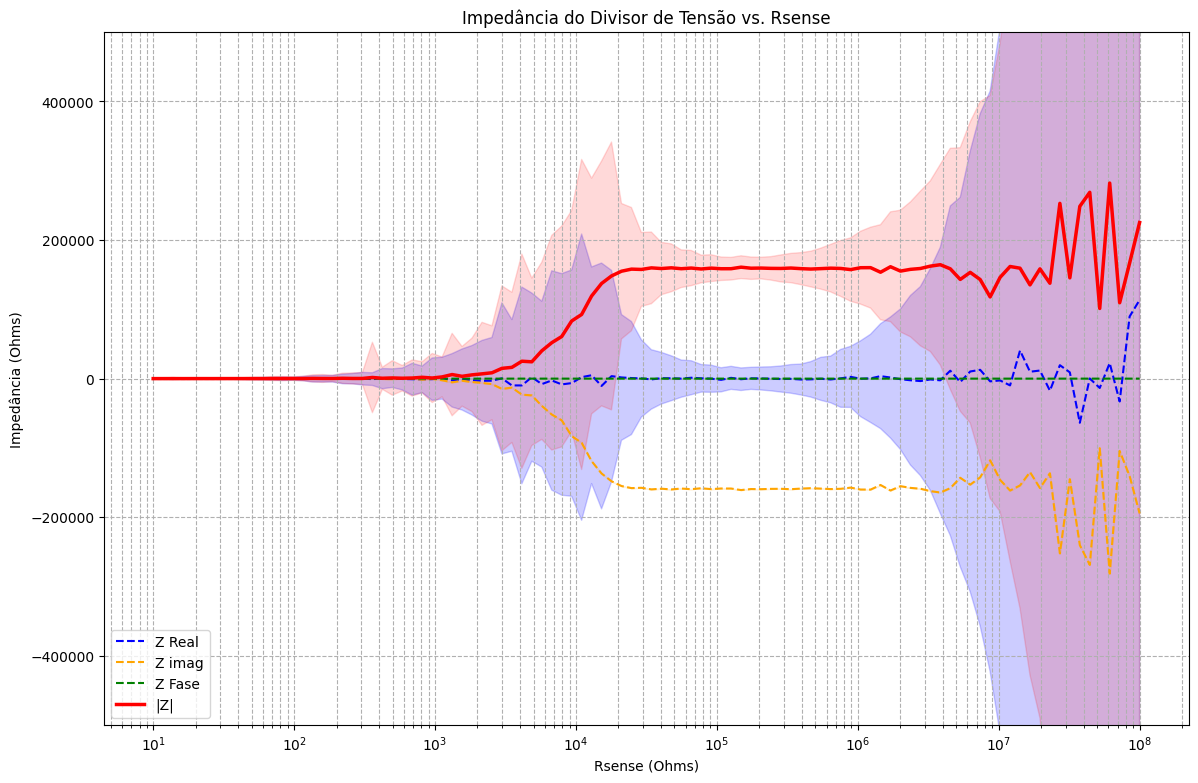

In [ ]:
plt.figure(figsize=(14, 9))

# Plot Vsense Real com sua incerteza
plt.plot(Rsense, ZReal_medio, label='Z Real', linestyle='--', color='blue')
plt.fill_between(Rsense, ZReal_medio - Zreal_std_dev, ZReal_medio + Zreal_std_dev, alpha=0.2, color='blue')

# Plot Vsense Imag com sua incerteza
plt.plot(Rsense, ZImag_medio, label='Z imag', linestyle='--', color='orange')
plt.fill_between(Rsense, ZImag_medio - imag_std_dev, ZImag_medio + imag_std_dev,
                 alpha=0.15, color='orange')

# Plot Fase com sua incerteza
plt.plot(Rsense, ZFase_media, label='Z Fase ', linestyle='--', color='green')
plt.fill_between(Rsense, ZFase_media - Zfase_std_dev, ZFase_media + Zfase_std_dev,
                 alpha=0.15, color='green')

# Plot Magnitude com sua incerteza
plt.plot(Rsense, Z_medio_modulo , label='|Z|', linestyle='-', color='red', linewidth=2.5)
plt.fill_between(Rsense, Z_medio_modulo - Z_std_dev, Z_medio_modulo + Z_std_dev,
                 alpha=0.15, color='red')
plt.xscale('log')
xlabel('Rsense (Ohms)')
ylabel('Impedância (Ohms)')
title('Impedância do Divisor de Tensão vs. Rsense')
plt.ylim(-500000, +500000)
legend()
plt.grid(True, which="both", linestyle='--')
plt.legend(loc='lower left')  # Posiciona a legenda para não atrapalhar
show()

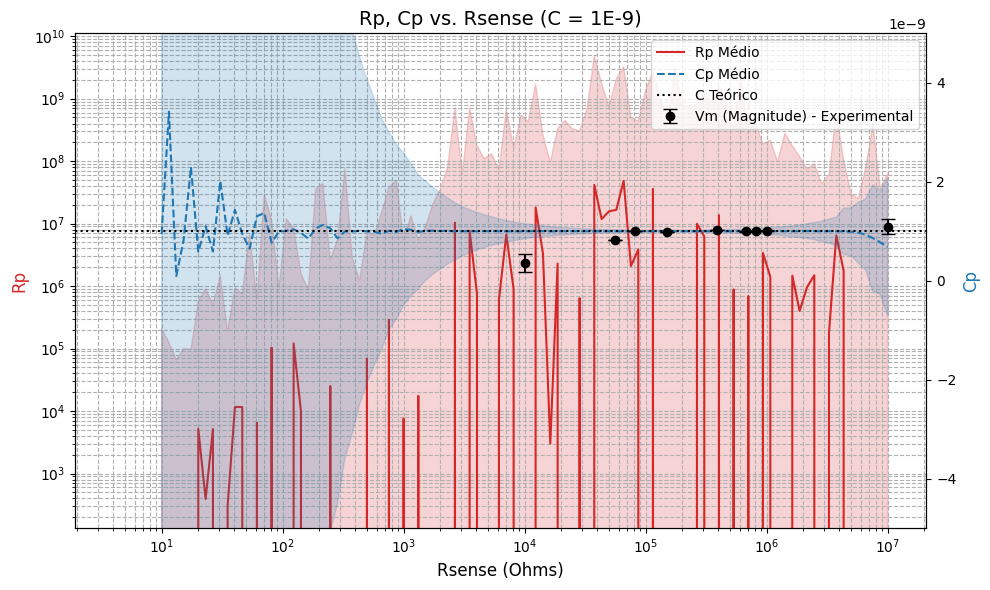

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

# variaveis
f = 1041.67
C = 1E-9
W = 2 * np.pi * f
reatC = 1 / (1j * W * C)
Vin = 3.3
N = 100
Rsense = np.geomspace(10, 10000000, num=N)
noise_std_dev = 0.01 * Vin
T = 10000

# Listas para armazenar os resultados de cada simulação
all_rp_results = []
all_cp_results = []


for i in range(T):
    # Simula a tensão medida com ruído
    noise = np.random.normal(0, noise_std_dev, N) + 1j * np.random.normal(0, noise_std_dev, N)
    vsense_com_ruido = Vin * reatC / (Rsense + reatC) + noise

    # Cálculo simplificado da impedância "medida"
    Z_com_ruido = (Rsense * vsense_com_ruido) / (Vin - vsense_com_ruido)

    # Conversão para o modelo (Rp, Cp)
    R_medido_inst = np.real(Z_com_ruido)
    X_medido_inst = np.imag(Z_com_ruido)

    Rp_inst = (R_medido_inst**2 + X_medido_inst**2) / R_medido_inst
    Cp_inst = - X_medido_inst / (W * (R_medido_inst**2 + X_medido_inst**2))

    # Armazena os resultados
    all_rp_results.append(Rp_inst)
    all_cp_results.append(Cp_inst)


# Calculo dos valores medios e std
Rp_medio = np.mean(all_rp_results, axis=0)
Cp_medio = np.mean(all_cp_results, axis=0)
Rp_std_dev = np.std(all_rp_results, axis=0)
Cp_std_dev = np.std(all_cp_results, axis=0)

rsense_experimental = [10000,56000,82000,150000,390000,680000,820000,1000000,10000000]
Cp_med_experimental = [0.366* 1e-9,0.818* 1e-9,1.006* 1e-9,0.983* 1e-9,1.028* 1e-9,0.998* 1e-9,1.007* 1e-9,1.009* 1e-9,1.087* 1e-9]
Cp_dp_experimental = [0.1838* 1e-9,0.0038* 1e-9,0.0055* 1e-9,0.0017* 1e-9,0.0022* 1e-9,0.0055* 1e-9,0.0054* 1e-9,0.0085* 1e-9,0.1511* 1e-9]

# Plotagem
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_title(f'Rp, Cp vs. Rsense (C = 1E-9)', fontsize=14)

# Eixo 1: Plot de Rp (vermelho)
color_rp = 'tab:red'
ax1.set_xlabel('Rsense (Ohms)', fontsize=12)
ax1.set_ylabel('Rp', color=color_rp, fontsize=12)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.plot(Rsense, Rp_medio, color=color_rp, label='Rp Médio')
ax1.fill_between(Rsense, Rp_medio - Rp_std_dev, Rp_medio + Rp_std_dev, alpha=0.2, color=color_rp)
ax1.grid(True, which="both", linestyle='--')


# Eixo 2: Plot de Cp (azul)
ax2 = ax1.twinx()
color_cp = 'tab:blue'
ax2.set_ylabel('Cp', color=color_cp, fontsize=12)
ax2.plot(Rsense, Cp_medio, color=color_cp, linestyle='--', label='Cp Médio')
ax2.errorbar(
    rsense_experimental,
    Cp_med_experimental,
    yerr=Cp_dp_experimental, # Define o tamanho das barras de erro
    fmt='o',                          # 'o' para pontos circulares, sem linha ligando-os
    color='black',                    # Cor que se destaque
    ecolor='black',                   # Cor das barras de erro
    capsize=5,                        # Adiciona as "tampas" nas barras de erro para melhor visualização
    label='Vm (Magnitude) - Experimental' # Legenda para os novos dados
)
ax2.fill_between(Rsense, Cp_medio - Cp_std_dev, Cp_medio + Cp_std_dev, alpha=0.2, color=color_cp)
ax2.axhline(y=C, color='black', linestyle=':', label=f'C Teórico')
ax2.set_ylim(- C * 5, C * 5)

# Legenda única para os dois eixos
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2)

fig.tight_layout()
plt.show()

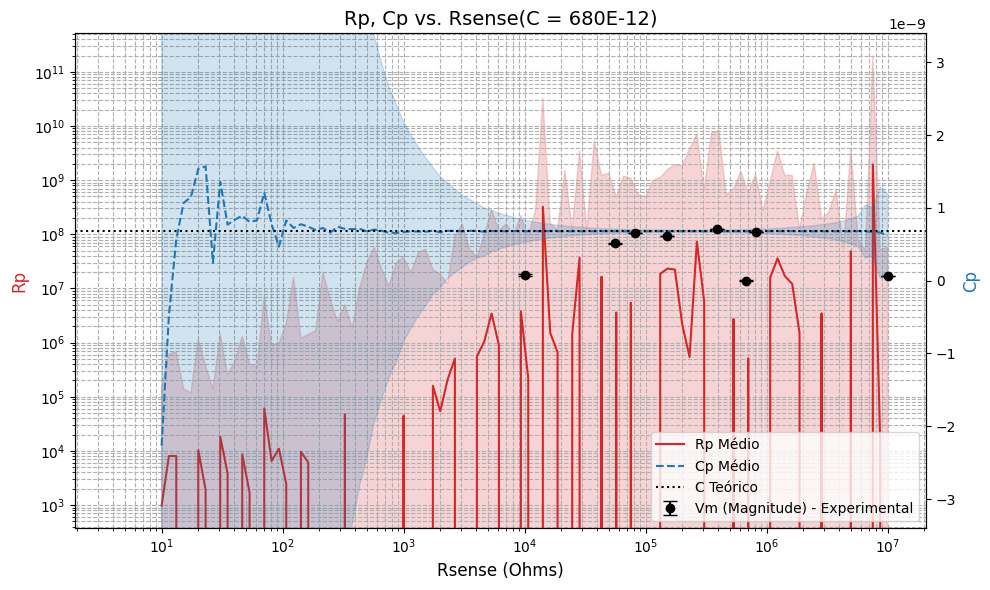

In [ ]:
# @title
# variaveis
f = 1041.67
C = 680E-12
W = 2 * np.pi * f
reatC = 1 / (1j * W * C)
Vin = 3.3
N = 100
Rsense = np.geomspace(10, 10000000, num=N)
noise_std_dev = 0.01 * Vin
T = 10000

# Listas para armazenar os resultados de cada simulação
all_rp_results = []
all_cp_results = []


for i in range(T):
    # Simula a tensão medida com ruído
    noise = np.random.normal(0, noise_std_dev, N) + 1j * np.random.normal(0, noise_std_dev, N)
    vsense_com_ruido = Vin * reatC / (Rsense + reatC) + noise

    # Cálculo simplificado da impedância "medida"
    Z_com_ruido = (Rsense * vsense_com_ruido) / (Vin - vsense_com_ruido)

    # Conversão para o modelo (Rp, Cp)
    R_medido_inst = np.real(Z_com_ruido)
    X_medido_inst = np.imag(Z_com_ruido)

    Rp_inst = (R_medido_inst**2 + X_medido_inst**2) / R_medido_inst
    Cp_inst = - X_medido_inst / (W * (R_medido_inst**2 + X_medido_inst**2))

    # Armazena os resultados
    all_rp_results.append(Rp_inst)
    all_cp_results.append(Cp_inst)


# Calculo dos valores medios e std
Rp_medio = np.mean(all_rp_results, axis=0)
Cp_medio = np.mean(all_cp_results, axis=0)
Rp_std_dev = np.std(all_rp_results, axis=0)
Cp_std_dev = np.std(all_cp_results, axis=0)

rsense_experimental = [10000,56000,82000,150000,390000,680000,820000,1000000,10000000]
Cp_med_experimental = [0.077* 1e-9,0.512* 1e-9,0.657* 1e-9,0.613* 1e-9,0.713* 1e-9,0.660* 1e-90,0.667* 1e-9,7.124* 1e-9,0.066* 1e-9]
Cp_dp_experimental = [0.0177* 1e-9,0.0060* 1e-9,0.0033* 1e-9,0.0027* 1e-9,0.0020* 1e-9,0.0040* 1e-9,0.0035* 1e-9,0.4717* 1e-9,0.0004* 1e-9]

# Plotagem
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_title(f'Rp, Cp vs. Rsense(C = 680E-12)', fontsize=14)

# Eixo 1: Plot de Rp (vermelho)
color_rp = 'tab:red'
ax1.set_xlabel('Rsense (Ohms)', fontsize=12)
ax1.set_ylabel('Rp', color=color_rp, fontsize=12)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.plot(Rsense, Rp_medio, color=color_rp, label='Rp Médio')
ax1.fill_between(Rsense, Rp_medio - Rp_std_dev, Rp_medio + Rp_std_dev, alpha=0.2, color=color_rp)
ax1.grid(True, which="both", linestyle='--')


# Eixo 2: Plot de Cp (azul)
ax2 = ax1.twinx()
color_cp = 'tab:blue'
ax2.set_ylabel('Cp', color=color_cp, fontsize=12)
ax2.plot(Rsense, Cp_medio, color=color_cp, linestyle='--', label='Cp Médio')
ax2.errorbar(
    rsense_experimental,
    Cp_med_experimental,
    yerr=Cp_dp_experimental, # Define o tamanho das barras de erro
    fmt='o',                          # 'o' para pontos circulares, sem linha ligando-os
    color='black',                    # Cor que se destaque
    ecolor='black',                   # Cor das barras de erro
    capsize=5,                        # Adiciona as "tampas" nas barras de erro para melhor visualização
    label='Vm (Magnitude) - Experimental' # Legenda para os novos dados
)
ax2.fill_between(Rsense, Cp_medio - Cp_std_dev, Cp_medio + Cp_std_dev, alpha=0.2, color=color_cp)
ax2.axhline(y=C, color='black', linestyle=':', label=f'C Teórico')
ax2.set_ylim(- C * 5, C * 5)

# Legenda única para os dois eixos
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2)

fig.tight_layout()
plt.show()

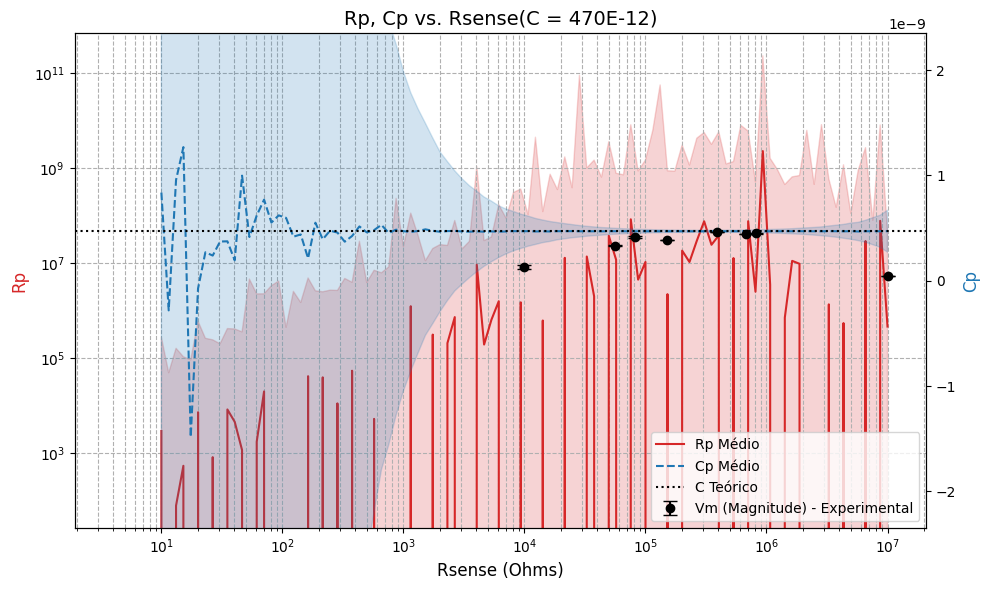

In [ ]:
# @title
# variaveis
f = 1041.67
C = 470E-12
W = 2 * np.pi * f
reatC = 1 / (1j * W * C)
Vin = 3.3
N = 100
Rsense = np.geomspace(10, 10000000, num=N)
noise_std_dev = 0.01 * Vin
T = 10000

# Listas para armazenar os resultados de cada simulação
all_rp_results = []
all_cp_results = []


for i in range(T):
    # Simula a tensão medida com ruído
    noise = np.random.normal(0, noise_std_dev, N) + 1j * np.random.normal(0, noise_std_dev, N)
    vsense_com_ruido = Vin * reatC / (Rsense + reatC) + noise

    # Cálculo simplificado da impedância "medida"
    Z_com_ruido = (Rsense * vsense_com_ruido) / (Vin - vsense_com_ruido)

    # Conversão para o modelo (Rp, Cp)
    R_medido_inst = np.real(Z_com_ruido)
    X_medido_inst = np.imag(Z_com_ruido)

    Rp_inst = (R_medido_inst**2 + X_medido_inst**2) / R_medido_inst
    Cp_inst = - X_medido_inst / (W * (R_medido_inst**2 + X_medido_inst**2))

    # Armazena os resultados
    all_rp_results.append(Rp_inst)
    all_cp_results.append(Cp_inst)


# Calculo dos valores medios e std
Rp_medio = np.mean(all_rp_results, axis=0)
Cp_medio = np.mean(all_cp_results, axis=0)
Rp_std_dev = np.std(all_rp_results, axis=0)
Cp_std_dev = np.std(all_cp_results, axis=0)

rsense_experimental = [10000,56000,82000,150000,390000,680000,820000,1000000,10000000]
Cp_med_experimental = [0.131* 1e-9, 0.332* 1e-9, 0.417* 1e-9, 0.388* 1e-9, 0.462* 1e-9, 0.445* 1e-9, 0.450* 1e-9, 4.896* 1e-9, 0.045* 1e-9]
Cp_dp_experimental = [0.0192* 1e-9, 0.0031* 1e-9, 0.0073* 1e-9, 0.0014* 1e-9, 0.0021* 1e-9, 0.0017* 1e-9, 0.0021* 1e-9, 0.2377* 1e-9, 0.0002* 1e-9]

# Plotagem
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_title(f'Rp, Cp vs. Rsense(C = 470E-12)', fontsize=14)

# Eixo 1: Plot de Rp (vermelho)
color_rp = 'tab:red'
ax1.set_xlabel('Rsense (Ohms)', fontsize=12)
ax1.set_ylabel('Rp', color=color_rp, fontsize=12)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.plot(Rsense, Rp_medio, color=color_rp, label='Rp Médio')
ax1.fill_between(Rsense, Rp_medio - Rp_std_dev, Rp_medio + Rp_std_dev, alpha=0.2, color=color_rp)
ax1.grid(True, which="both", linestyle='--')


# Eixo 2: Plot de Cp (azul)
ax2 = ax1.twinx()
color_cp = 'tab:blue'
ax2.set_ylabel('Cp', color=color_cp, fontsize=12)
ax2.plot(Rsense, Cp_medio, color=color_cp, linestyle='--', label='Cp Médio')
ax2.errorbar(
    rsense_experimental,
    Cp_med_experimental,
    yerr=Cp_dp_experimental, # Define o tamanho das barras de erro
    fmt='o',                          # 'o' para pontos circulares, sem linha ligando-os
    color='black',                    # Cor que se destaque
    ecolor='black',                   # Cor das barras de erro
    capsize=5,                        # Adiciona as "tampas" nas barras de erro para melhor visualização
    label='Vm (Magnitude) - Experimental' # Legenda para os novos dados
)
ax2.fill_between(Rsense, Cp_medio - Cp_std_dev, Cp_medio + Cp_std_dev, alpha=0.2, color=color_cp)
ax2.axhline(y=C, color='black', linestyle=':', label=f'C Teórico')
ax2.set_ylim(- C * 5, C * 5)

# Legenda única para os dois eixos
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2)

fig.tight_layout()
plt.show()

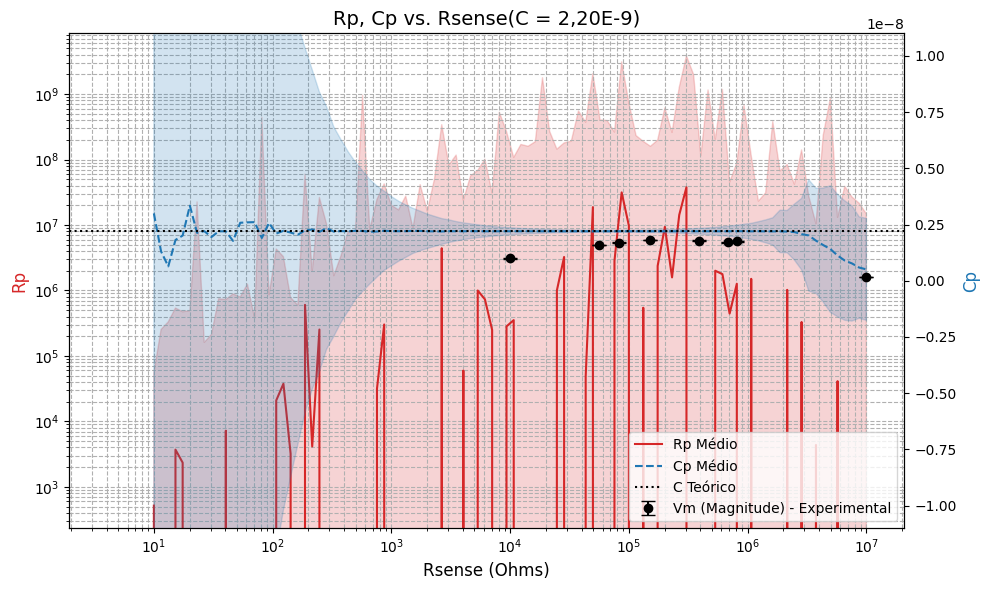

In [ ]:
# @title
# variaveis
f = 1041.67
C = 2.20E-9
W = 2 * np.pi * f
reatC = 1 / (1j * W * C)
Vin = 3.3
N = 100
Rsense = np.geomspace(10, 10000000, num=N)
noise_std_dev = 0.01 * Vin
T = 10000

# Listas para armazenar os resultados de cada simulação
all_rp_results = []
all_cp_results = []


for i in range(T):
    # Simula a tensão medida com ruído
    noise = np.random.normal(0, noise_std_dev, N) + 1j * np.random.normal(0, noise_std_dev, N)
    vsense_com_ruido = Vin * reatC / (Rsense + reatC) + noise

    # Cálculo simplificado da impedância "medida"
    Z_com_ruido = (Rsense * vsense_com_ruido) / (Vin - vsense_com_ruido)

    # Conversão para o modelo (Rp, Cp)
    R_medido_inst = np.real(Z_com_ruido)
    X_medido_inst = np.imag(Z_com_ruido)

    Rp_inst = (R_medido_inst**2 + X_medido_inst**2) / R_medido_inst
    Cp_inst = - X_medido_inst / (W * (R_medido_inst**2 + X_medido_inst**2))

    # Armazena os resultados
    all_rp_results.append(Rp_inst)
    all_cp_results.append(Cp_inst)


# Calculo dos valores medios e std
Rp_medio = np.mean(all_rp_results, axis=0)
Cp_medio = np.mean(all_cp_results, axis=0)
Rp_std_dev = np.std(all_rp_results, axis=0)
Cp_std_dev = np.std(all_cp_results, axis=0)

rsense_experimental = [10000,56000,82000,150000,390000,680000,820000,1000000,10000000]
Cp_med_experimental = [1.009* 1e-9, 1.585* 1e-9, 1.697* 1e-9, 1.810* 1e-9, 1.781* 1e-9, 1.703* 1e-9, 1.747* 1e-9, 18.869* 1e-9, 0.174* 1e-9]
Cp_dp_experimental = [0.0219* 1e-9, 0.0098* 1e-9, 0.0053* 1e-9, 0.0052* 1e-9, 0.0129* 1e-9, 0.0160* 1e-9, 0.0196* 1e-9, 6.0209* 1e-9, 0.0029* 1e-9]
# Plotagem
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_title(f'Rp, Cp vs. Rsense(C = 2,20E-9)', fontsize=14)

# Eixo 1: Plot de Rp (vermelho)
color_rp = 'tab:red'
ax1.set_xlabel('Rsense (Ohms)', fontsize=12)
ax1.set_ylabel('Rp', color=color_rp, fontsize=12)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.plot(Rsense, Rp_medio, color=color_rp, label='Rp Médio')
ax1.fill_between(Rsense, Rp_medio - Rp_std_dev, Rp_medio + Rp_std_dev, alpha=0.2, color=color_rp)
ax1.grid(True, which="both", linestyle='--')


# Eixo 2: Plot de Cp (azul)
ax2 = ax1.twinx()
color_cp = 'tab:blue'
ax2.set_ylabel('Cp', color=color_cp, fontsize=12)
ax2.plot(Rsense, Cp_medio, color=color_cp, linestyle='--', label='Cp Médio')
ax2.errorbar(
    rsense_experimental,
    Cp_med_experimental,
    yerr=Cp_dp_experimental, # Define o tamanho das barras de erro
    fmt='o',                          # 'o' para pontos circulares, sem linha ligando-os
    color='black',                    # Cor que se destaque
    ecolor='black',                   # Cor das barras de erro
    capsize=5,                        # Adiciona as "tampas" nas barras de erro para melhor visualização
    label='Vm (Magnitude) - Experimental' # Legenda para os novos dados
)
ax2.fill_between(Rsense, Cp_medio - Cp_std_dev, Cp_medio + Cp_std_dev, alpha=0.2, color=color_cp)
ax2.axhline(y=C, color='black', linestyle=':', label=f'C Teórico')
ax2.set_ylim(- C * 5, C * 5)

# Legenda única para os dois eixos
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2)

fig.tight_layout()
plt.show()

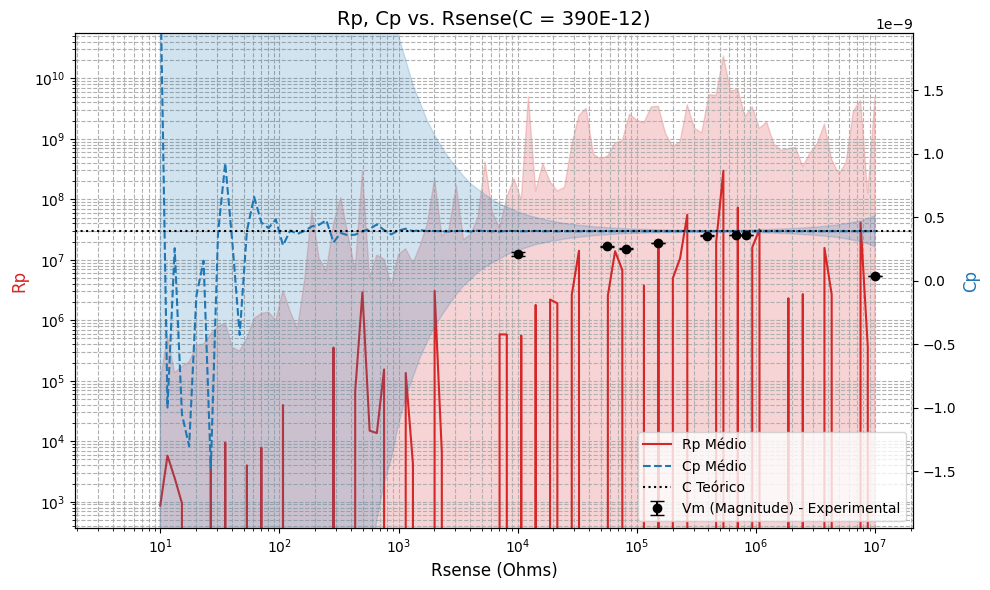

In [ ]:
# @title
# variaveis
f = 1041.67
C = 390E-12
W = 2 * np.pi * f
reatC = 1 / (1j * W * C)
Vin = 3.3
N = 100
Rsense = np.geomspace(10, 10000000, num=N)
noise_std_dev = 0.01 * Vin
T = 10000

# Listas para armazenar os resultados de cada simulação
all_rp_results = []
all_cp_results = []


for i in range(T):
    # Simula a tensão medida com ruído
    noise = np.random.normal(0, noise_std_dev, N) + 1j * np.random.normal(0, noise_std_dev, N)
    vsense_com_ruido = Vin * reatC / (Rsense + reatC) + noise

    # Cálculo simplificado da impedância "medida"
    Z_com_ruido = (Rsense * vsense_com_ruido) / (Vin - vsense_com_ruido)

    # Conversão para o modelo (Rp, Cp)
    R_medido_inst = np.real(Z_com_ruido)
    X_medido_inst = np.imag(Z_com_ruido)

    Rp_inst = (R_medido_inst**2 + X_medido_inst**2) / R_medido_inst
    Cp_inst = - X_medido_inst / (W * (R_medido_inst**2 + X_medido_inst**2))

    # Armazena os resultados
    all_rp_results.append(Rp_inst)
    all_cp_results.append(Cp_inst)


# Calculo dos valores medios e std
Rp_medio = np.mean(all_rp_results, axis=0)
Cp_medio = np.mean(all_cp_results, axis=0)
Rp_std_dev = np.std(all_rp_results, axis=0)
Cp_std_dev = np.std(all_cp_results, axis=0)

rsense_experimental = [10000,56000,82000,150000,390000,680000,820000,1000000,10000000]
Cp_med_experimental = [0.209 * 1e-9, 0.271 * 1e-9, 0.254 * 1e-9, 0.297 * 1e-9, 0.356 * 1e-9, 0.359 * 1e-9, 0.363 * 1e-9, 3.909 * 1e-9, 0.037 * 1e-9]
Cp_dp_experimental = [0.0172 * 1e-9, 0.0035 * 1e-9, 0.0034 * 1e-9, 0.0018 * 1e-9, 0.0009 * 1e-9, 0.0013 * 1e-9, 0.0011 * 1e-9, 0.1863 * 1e-9, 0.0003 * 1e-9]
# Plotagem
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_title(f'Rp, Cp vs. Rsense(C = 390E-12)', fontsize=14)

# Eixo 1: Plot de Rp (vermelho)
color_rp = 'tab:red'
ax1.set_xlabel('Rsense (Ohms)', fontsize=12)
ax1.set_ylabel('Rp', color=color_rp, fontsize=12)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.plot(Rsense, Rp_medio, color=color_rp, label='Rp Médio')
ax1.fill_between(Rsense, Rp_medio - Rp_std_dev, Rp_medio + Rp_std_dev, alpha=0.2, color=color_rp)
ax1.grid(True, which="both", linestyle='--')


# Eixo 2: Plot de Cp (azul)
ax2 = ax1.twinx()
color_cp = 'tab:blue'
ax2.set_ylabel('Cp', color=color_cp, fontsize=12)
ax2.plot(Rsense, Cp_medio, color=color_cp, linestyle='--', label='Cp Médio')
ax2.errorbar(
    rsense_experimental,
    Cp_med_experimental,
    yerr=Cp_dp_experimental, # Define o tamanho das barras de erro
    fmt='o',                          # 'o' para pontos circulares, sem linha ligando-os
    color='black',                    # Cor que se destaque
    ecolor='black',                   # Cor das barras de erro
    capsize=5,                        # Adiciona as "tampas" nas barras de erro para melhor visualização
    label='Vm (Magnitude) - Experimental' # Legenda para os novos dados
)
ax2.fill_between(Rsense, Cp_medio - Cp_std_dev, Cp_medio + Cp_std_dev, alpha=0.2, color=color_cp)
ax2.axhline(y=C, color='black', linestyle=':', label=f'C Teórico')
ax2.set_ylim(- C * 5, C * 5)

# Legenda única para os dois eixos
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2)

fig.tight_layout()
plt.show()

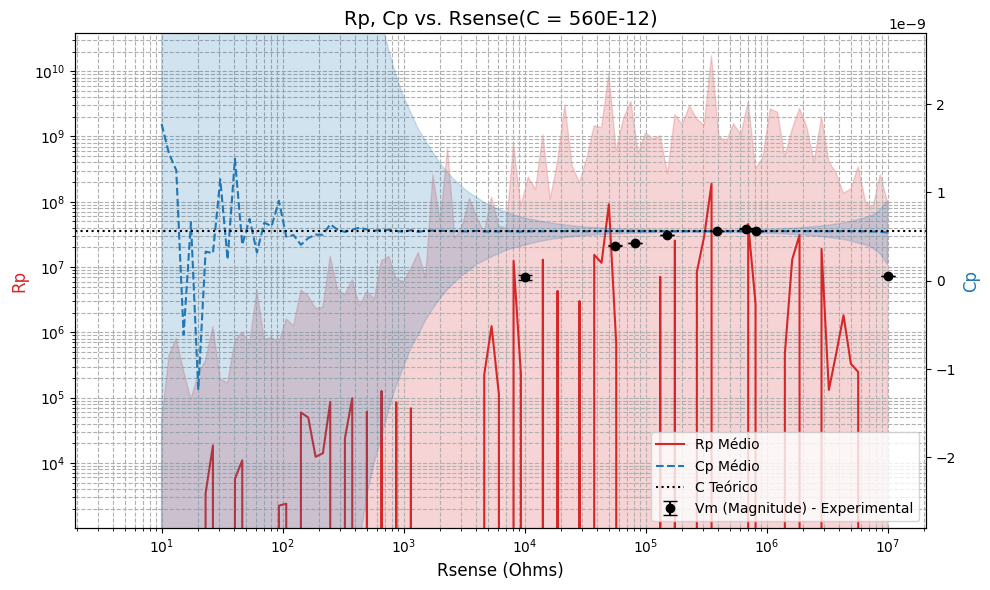

In [ ]:
# @title
# variaveis
f = 1041.67
C = 560E-12
W = 2 * np.pi * f
reatC = 1 / (1j * W * C)
Vin = 3.3
N = 100
Rsense = np.geomspace(10, 10000000, num=N)
noise_std_dev = 0.01 * Vin
T = 10000

# Listas para armazenar os resultados de cada simulação
all_rp_results = []
all_cp_results = []


for i in range(T):
    # Simula a tensão medida com ruído
    noise = np.random.normal(0, noise_std_dev, N) + 1j * np.random.normal(0, noise_std_dev, N)
    vsense_com_ruido = Vin * reatC / (Rsense + reatC) + noise

    # Cálculo simplificado da impedância "medida"
    Z_com_ruido = (Rsense * vsense_com_ruido) / (Vin - vsense_com_ruido)

    # Conversão para o modelo (Rp, Cp)
    R_medido_inst = np.real(Z_com_ruido)
    X_medido_inst = np.imag(Z_com_ruido)

    Rp_inst = (R_medido_inst**2 + X_medido_inst**2) / R_medido_inst
    Cp_inst = - X_medido_inst / (W * (R_medido_inst**2 + X_medido_inst**2))

    # Armazena os resultados
    all_rp_results.append(Rp_inst)
    all_cp_results.append(Cp_inst)


# Calculo dos valores medios e std
Rp_medio = np.mean(all_rp_results, axis=0)
Cp_medio = np.mean(all_cp_results, axis=0)
Rp_std_dev = np.std(all_rp_results, axis=0)
Cp_std_dev = np.std(all_cp_results, axis=0)

rsense_experimental = [10000,56000,82000,150000,390000,680000,820000,1000000,10000000]
Cp_med_experimental = [0.037 * 1e-9, 0.397 * 1e-9, 0.427 * 1e-9, 0.518 * 1e-9, 0.564 * 1e-9, 0.591 * 1e-9, 0.566 * 1e-9, 6.011 * 1e-9, 0.058 * 1e-9]
Cp_dp_experimental = [0.0249 * 1e-9, 0.0044 * 1e-9, 0.0028 * 1e-9, 0.0039 * 1e-9, 0.0030 * 1e-9, 0.0030 * 1e-9, 0.0024 * 1e-9, 0.4148 * 1e-9, 0.0005 * 1e-9]
# Plotagem
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_title(f'Rp, Cp vs. Rsense(C = 560E-12)', fontsize=14)

# Eixo 1: Plot de Rp (vermelho)
color_rp = 'tab:red'
ax1.set_xlabel('Rsense (Ohms)', fontsize=12)
ax1.set_ylabel('Rp', color=color_rp, fontsize=12)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.plot(Rsense, Rp_medio, color=color_rp, label='Rp Médio')
ax1.fill_between(Rsense, Rp_medio - Rp_std_dev, Rp_medio + Rp_std_dev, alpha=0.2, color=color_rp)
ax1.grid(True, which="both", linestyle='--')


# Eixo 2: Plot de Cp (azul)
ax2 = ax1.twinx()
color_cp = 'tab:blue'
ax2.set_ylabel('Cp', color=color_cp, fontsize=12)
ax2.plot(Rsense, Cp_medio, color=color_cp, linestyle='--', label='Cp Médio')
ax2.errorbar(
    rsense_experimental,
    Cp_med_experimental,
    yerr=Cp_dp_experimental, # Define o tamanho das barras de erro
    fmt='o',                          # 'o' para pontos circulares, sem linha ligando-os
    color='black',                    # Cor que se destaque
    ecolor='black',                   # Cor das barras de erro
    capsize=5,                        # Adiciona as "tampas" nas barras de erro para melhor visualização
    label='Vm (Magnitude) - Experimental' # Legenda para os novos dados
)
ax2.fill_between(Rsense, Cp_medio - Cp_std_dev, Cp_medio + Cp_std_dev, alpha=0.2, color=color_cp)
ax2.axhline(y=C, color='black', linestyle=':', label=f'C Teórico')
ax2.set_ylim(- C * 5, C * 5)

# Legenda única para os dois eixos
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2)

fig.tight_layout()
plt.show()

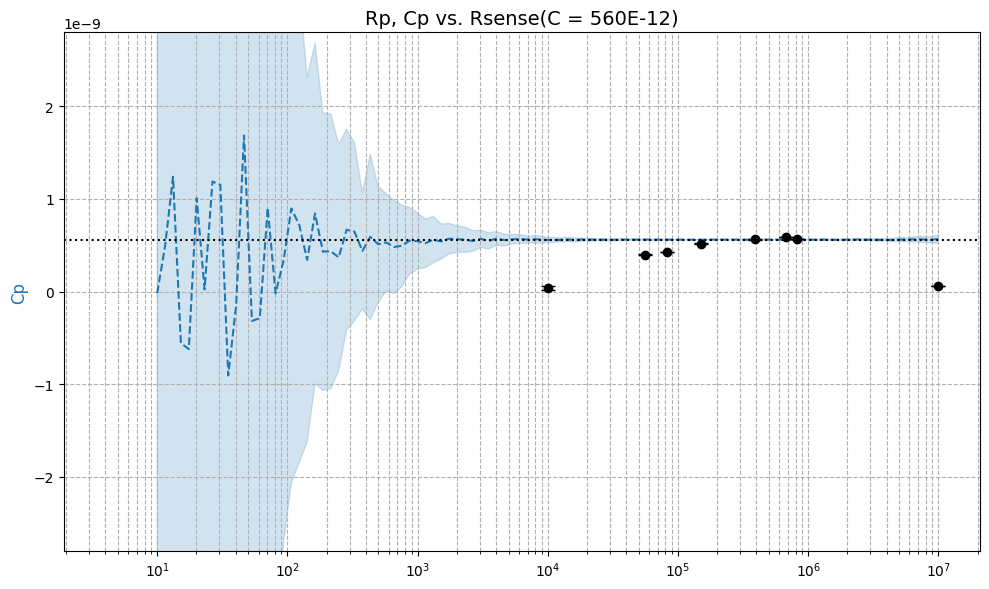

In [ ]:
# edu: reduzindo ruido, e retirando Rp

# @title
# variaveis
f = 1041.67
C = 560E-12
W = 2 * np.pi * f
reatC = 1 / (1j * W * C)
Vin = 3.3
N = 100
Rsense = np.geomspace(10, 10000000, num=N)
noise_std_dev = 0.002 * Vin
T = 100

# Listas para armazenar os resultados de cada simulação
all_rp_results = []
all_cp_results = []


for i in range(T):
    # Simula a tensão medida com ruído
    noise = np.random.normal(0, noise_std_dev, N) + 1j * np.random.normal(0, noise_std_dev, N)
    vsense_com_ruido = Vin * reatC / (Rsense + reatC) + noise

    # Cálculo simplificado da impedância "medida"
    Z_com_ruido = (Rsense * vsense_com_ruido) / (Vin - vsense_com_ruido)

    # Conversão para o modelo (Rp, Cp)
    R_medido_inst = np.real(Z_com_ruido)
    X_medido_inst = np.imag(Z_com_ruido)

    Rp_inst = (R_medido_inst**2 + X_medido_inst**2) / R_medido_inst
    Cp_inst = - X_medido_inst / (W * (R_medido_inst**2 + X_medido_inst**2))

    # Armazena os resultados
    all_rp_results.append(Rp_inst)
    all_cp_results.append(Cp_inst)


# Calculo dos valores medios e std
Rp_medio = np.mean(all_rp_results, axis=0)
Cp_medio = np.mean(all_cp_results, axis=0)
Rp_std_dev = np.std(all_rp_results, axis=0)
Cp_std_dev = np.std(all_cp_results, axis=0)

rsense_experimental = [10000,56000,82000,150000,390000,680000,820000,1000000,10000000]
Cp_med_experimental = [0.037 * 1e-9, 0.397 * 1e-9, 0.427 * 1e-9, 0.518 * 1e-9, 0.564 * 1e-9, 0.591 * 1e-9, 0.566 * 1e-9, 6.011 * 1e-9, 0.058 * 1e-9]
Cp_dp_experimental = [0.0249 * 1e-9, 0.0044 * 1e-9, 0.0028 * 1e-9, 0.0039 * 1e-9, 0.0030 * 1e-9, 0.0030 * 1e-9, 0.0024 * 1e-9, 0.4148 * 1e-9, 0.0005 * 1e-9]
# Plotagem
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_title(f'Rp, Cp vs. Rsense(C = 560E-12)', fontsize=14)

# Eixo 1: Plot de Rp (vermelho)
# color_rp = 'tab:red'
# ax1.set_xlabel('Rsense (Ohms)', fontsize=12)
# ax1.set_ylabel('Rp', color=color_rp, fontsize=12)
ax1.set_xscale('log')
#ax1.set_yscale('log')
# ax1.plot(Rsense, Rp_medio, color=color_rp, label='Rp Médio')
# ax1.fill_between(Rsense, Rp_medio - Rp_std_dev, Rp_medio + Rp_std_dev, alpha=0.2, color=color_rp)
ax1.grid(True, which="both", linestyle='--')


# Eixo 2: Plot de Cp (azul)
# ax2 = ax1.twinx()
color_cp = 'tab:blue'
ax1.set_ylabel('Cp', color=color_cp, fontsize=12)
ax1.plot(Rsense, Cp_medio, color=color_cp, linestyle='--', label='Cp Médio')
ax1.errorbar(
    rsense_experimental,
    Cp_med_experimental,
    yerr=Cp_dp_experimental, # Define o tamanho das barras de erro
    fmt='o',                          # 'o' para pontos circulares, sem linha ligando-os
    color='black',                    # Cor que se destaque
    ecolor='black',                   # Cor das barras de erro
    capsize=5,                        # Adiciona as "tampas" nas barras de erro para melhor visualização
    label='Vm (Magnitude) - Experimental' # Legenda para os novos dados
)
ax1.fill_between(Rsense, Cp_medio - Cp_std_dev, Cp_medio + Cp_std_dev, alpha=0.2, color=color_cp)
ax1.axhline(y=C, color='black', linestyle=':', label=f'C Teórico')
ax1.set_ylim(- C * 5, C * 5)

# Legenda única para os dois eixos
# lines, labels = ax1.get_legend_handles_labels()
# lines2, labels2 = ax1.get_legend_handles_labels()
# ax1.legend(lines + lines2, labels + labels2)

fig.tight_layout()
plt.show()

Razão Sinal / Ruido = mu / sigma =500.0 = 54 dB


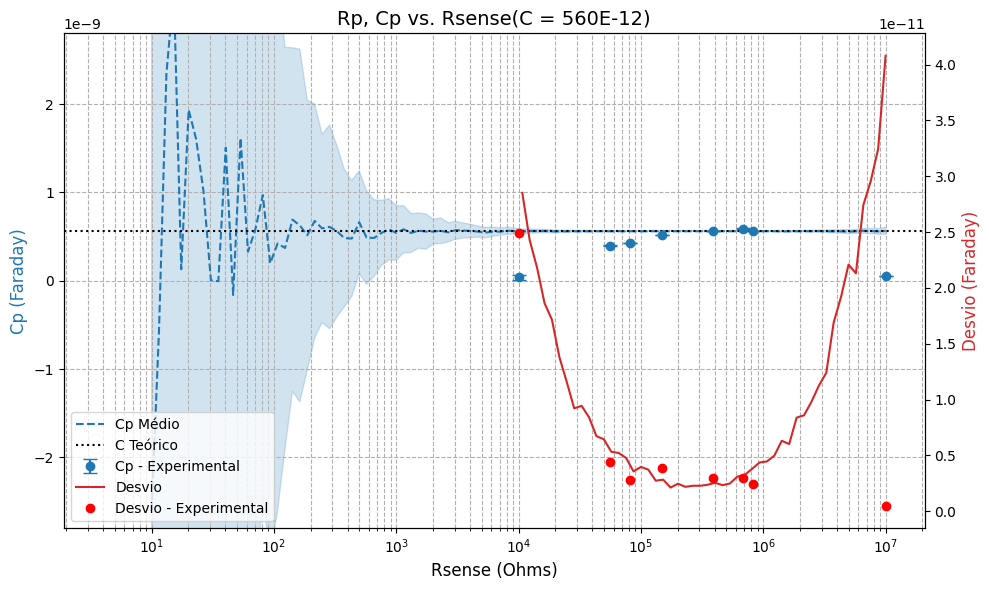

In [ ]:
# edu: Plotar desvio padrao separado

# @title
# variaveis
f = 1041.67
C = 560E-12
W = 2 * np.pi * f
reatC = 1 / (1j * W * C)
Vin = 3.3
N = 100
Rsense = np.geomspace(10, 10000000, num=N)
noise_std_dev = 0.002 * Vin
print(f'Razão Sinal / Ruido = mu / sigma ={Vin / noise_std_dev } = {20*log10(Vin / noise_std_dev):.0f} dB')
T = 100

# Listas para armazenar os resultados de cada simulação
all_rp_results = []
all_cp_results = []


for i in range(T):
    # Simula a tensão medida com ruído
    noise = np.random.normal(0, noise_std_dev, N) + 1j * np.random.normal(0, noise_std_dev, N)
    vsense_com_ruido = Vin * reatC / (Rsense + reatC) + noise

    # Cálculo simplificado da impedância "medida"
    Z_com_ruido = (Rsense * vsense_com_ruido) / (Vin - vsense_com_ruido)

    # Conversão para o modelo (Rp, Cp)
    R_medido_inst = np.real(Z_com_ruido)
    X_medido_inst = np.imag(Z_com_ruido)

    Rp_inst = (R_medido_inst**2 + X_medido_inst**2) / R_medido_inst
    Cp_inst = - X_medido_inst / (W * (R_medido_inst**2 + X_medido_inst**2))

    # Armazena os resultados
    all_rp_results.append(Rp_inst)
    all_cp_results.append(Cp_inst)


# Calculo dos valores medios e std
Rp_medio = np.mean(all_rp_results, axis=0)
Cp_medio = np.mean(all_cp_results, axis=0)
Rp_std_dev = np.std(all_rp_results, axis=0)
Cp_std_dev = np.std(all_cp_results, axis=0)

rsense_experimental = [10000,56000,82000,150000,390000,680000,820000,1000000,10000000]
Cp_med_experimental = [0.037 * 1e-9, 0.397 * 1e-9, 0.427 * 1e-9, 0.518 * 1e-9, 0.564 * 1e-9, 0.591 * 1e-9, 0.566 * 1e-9, 6.011 * 1e-9, 0.058 * 1e-9]
Cp_dp_experimental = [0.0249 * 1e-9, 0.0044 * 1e-9, 0.0028 * 1e-9, 0.0039 * 1e-9, 0.0030 * 1e-9, 0.0030 * 1e-9, 0.0024 * 1e-9, 0.4148 * 1e-9, 0.0005 * 1e-9]
# Plotagem
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_title(f'Rp, Cp vs. Rsense(C = 560E-12)', fontsize=14)

# Eixo 1: Plot de Cp (azul)
# ax2 = ax1.twinx()
ax1.set_xscale('log')
ax1.grid(True, which="both", linestyle='--')
color_cp = 'tab:blue'
ax1.set_ylabel('Cp (Faraday)', color=color_cp, fontsize=12)
ax1.plot(Rsense, Cp_medio, color=color_cp, linestyle='--', label='Cp Médio')
ax1.errorbar(
    rsense_experimental,
    Cp_med_experimental,
    yerr=Cp_dp_experimental, # Define o tamanho das barras de erro
    fmt='o',                          # 'o' para pontos circulares, sem linha ligando-os
    color=color_cp,                    # Cor que se destaque
    ecolor=color_cp,                   # Cor das barras de erro
    capsize=5,                        # Adiciona as "tampas" nas barras de erro para melhor visualização
    label='Cp - Experimental' # Legenda para os novos dados
)
ax1.fill_between(Rsense, Cp_medio - Cp_std_dev, Cp_medio + Cp_std_dev, alpha=0.2, color=color_cp)
ax1.axhline(y=C, color='black', linestyle=':', label=f'C Teórico')
ax1.set_ylim(- C * 5, C * 5)
ax1.set_xlabel('Rsense (Ohms)', fontsize=12)

# Eixo 2: Plot de desvio padrao (vermelho)

#limitar faixa
cond= Rsense>10e3
Rsen, Cp_std = Rsense[cond], Cp_std_dev[cond]
 # retira outlier
Cp_dp_experimental[7]= np.nan
ax2 = ax1.twinx()
color_rp = 'tab:red'
ax2.set_ylabel('Desvio (Faraday)', color=color_rp, fontsize=12)
ax2.set_xscale('log')
ax2.plot(Rsen, Cp_std, color=color_rp, label='Desvio')
# ax1.fill_between(Rsense, Rp_medio - Rp_std_dev, Rp_medio + Rp_std_dev, alpha=0.2, color=color_rp)
# ax1.grid(True, which="both", linestyle='--')
# ax1.plot(Rsense, Cp_medio, color=color_cp, linestyle='--', label='Cp Médio')
ax2.plot(
    rsense_experimental,
    Cp_dp_experimental,
    'o',                          # 'o' para pontos circulares, sem linha ligando-os
    color='red',                    # Cor que se destaque
    label='Desvio - Experimental' # Legenda para os novos dados
)


# Legenda única para os dois eixos
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='lower left')

fig.tight_layout()
plt.show()

O desvio padrão experimental fico parecido com esta SNR de 50 dB.

Razão Sinal / Ruido = mu / sigma =50.0 = 34 dB


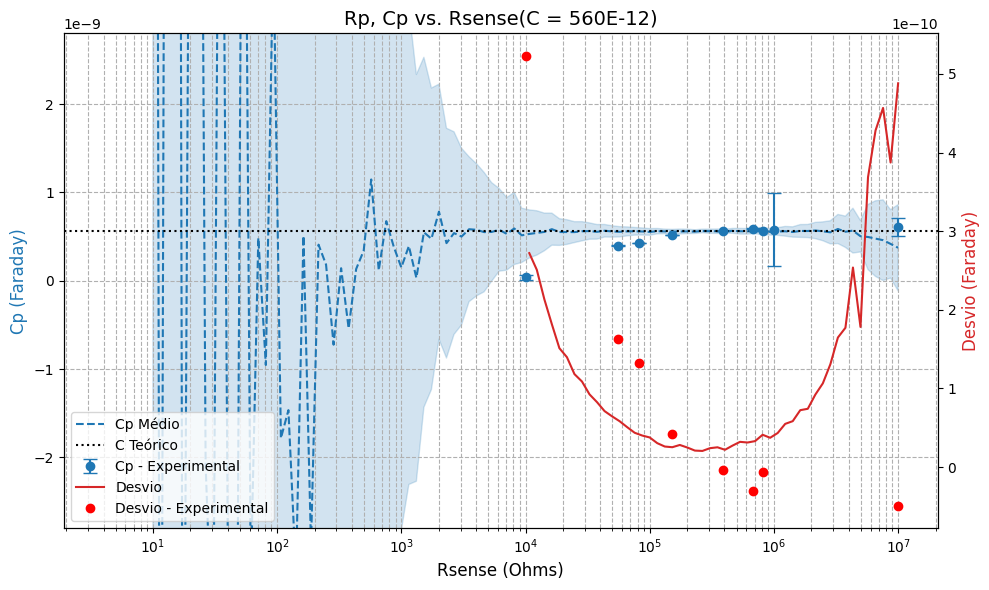

In [4]:
# edu: Plotar o desvio do teorico separado

# @title
# variaveis
f = 1041.67
C = 560E-12
W = 2 * np.pi * f
reatC = 1 / (1j * W * C)
Vin = 3.3
N = 100
Rsense = np.geomspace(10, 10000000, num=N)
noise_std_dev = 0.02 * Vin
print(f'Razão Sinal / Ruido = mu / sigma ={Vin / noise_std_dev :.1f} = {20*log10(Vin / noise_std_dev):.0f} dB')

T = 100

# Listas para armazenar os resultados de cada simulação
all_rp_results = []
all_cp_results = []


for i in range(T):
    # Simula a tensão medida com ruído
    noise = np.random.normal(0, noise_std_dev, N) + 1j * np.random.normal(0, noise_std_dev, N)
    vsense_com_ruido = Vin * reatC / (Rsense + reatC) + noise

    # Cálculo simplificado da impedância "medida"
    Z_com_ruido = (Rsense * vsense_com_ruido) / (Vin - vsense_com_ruido)

    # Conversão para o modelo (Rp, Cp)
    R_medido_inst = np.real(Z_com_ruido)
    X_medido_inst = np.imag(Z_com_ruido)

    Rp_inst = (R_medido_inst**2 + X_medido_inst**2) / R_medido_inst
    Cp_inst = - X_medido_inst / (W * (R_medido_inst**2 + X_medido_inst**2))

    # Armazena os resultados
    all_rp_results.append(Rp_inst)
    all_cp_results.append(Cp_inst)


# Calculo dos valores medios e std
Rp_medio = np.mean(all_rp_results, axis=0)
Cp_medio = np.mean(all_cp_results, axis=0)
Rp_std_dev = np.std(all_rp_results, axis=0)
Cp_std_dev = np.std(all_cp_results, axis=0)

rsense_experimental = [10000,56000,82000,150000,390000,680000,820000,1000000,10000000]
Cp_med_experimental = [0.037 * 1e-9, 0.397 * 1e-9, 0.427 * 1e-9, 0.518 * 1e-9, 0.564 * 1e-9, 0.591 * 1e-9, 0.566 * 1e-9, 0.578 * 1e-9, 0.609 * 1e-9]
Cp_dp_experimental = [0.0249 * 1e-9, 0.0044 * 1e-9, 0.0028 * 1e-9, 0.0039 * 1e-9, 0.0030 * 1e-9, 0.0030 * 1e-9, 0.0024 * 1e-9, 0.4148 * 1e-9, 0.10 * 1e-9]
# Plotagem
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_title(f'Rp, Cp vs. Rsense(C = 560E-12)', fontsize=14)

# Eixo 1: Plot de Cp (azul)
# ax2 = ax1.twinx()
ax1.set_xscale('log')
ax1.grid(True, which="both", linestyle='--')
color_cp = 'tab:blue'
ax1.set_ylabel('Cp (Faraday)', color=color_cp, fontsize=12)
ax1.plot(Rsense, Cp_medio, color=color_cp, linestyle='--', label='Cp Médio')
ax1.errorbar(
    rsense_experimental,
    Cp_med_experimental,
    yerr=Cp_dp_experimental, # Define o tamanho das barras de erro
    fmt='o',                          # 'o' para pontos circulares, sem linha ligando-os
    color=color_cp,                    # Cor que se destaque
    ecolor=color_cp,                   # Cor das barras de erro
    capsize=5,                        # Adiciona as "tampas" nas barras de erro para melhor visualização
    label='Cp - Experimental' # Legenda para os novos dados
)
ax1.fill_between(Rsense, Cp_medio - Cp_std_dev, Cp_medio + Cp_std_dev, alpha=0.2, color=color_cp)
ax1.axhline(y=C, color='black', linestyle=':', label=f'C Teórico')
ax1.set_ylim(- C * 5, C * 5)
ax1.set_xlabel('Rsense (Ohms)', fontsize=12)

# Eixo 2: Plot de desvio padrao (vermelho)

#limitar faixa
cond= Rsense>10e3
Rsen, Cp_std = Rsense[cond], Cp_std_dev[cond]
# retira outlier
Cp_med_experimental[7]= np.nan

ax2 = ax1.twinx()
color_rp = 'tab:red'
ax2.set_ylabel('Desvio (Faraday)', color=color_rp, fontsize=12)
ax2.set_xscale('log')
ax2.plot(Rsen, Cp_std, color=color_rp, label='Desvio')
# ax1.fill_between(Rsense, Rp_medio - Rp_std_dev, Rp_medio + Rp_std_dev, alpha=0.2, color=color_rp)
# ax1.grid(True, which="both", linestyle='--')
# ax1.plot(Rsense, Cp_medio, color=color_cp, linestyle='--', label='Cp Médio')
ax2.plot(
    rsense_experimental,
    C-array(Cp_med_experimental),
    'o',                          # 'o' para pontos circulares, sem linha ligando-os
    color='red',                    # Cor que se destaque
    label='Desvio - Experimental' # Legenda para os novos dados
)


# Legenda única para os dois eixos
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='lower left')

fig.tight_layout()
plt.show()

O desvio do valor teorico ficou próximo de uma relação teorica SNR = 34 dB

Podemos verificar estes dois ultimos gráficos, com os valores do Capacitor medido pel LCR e do Rsense medido pelo multimetro.

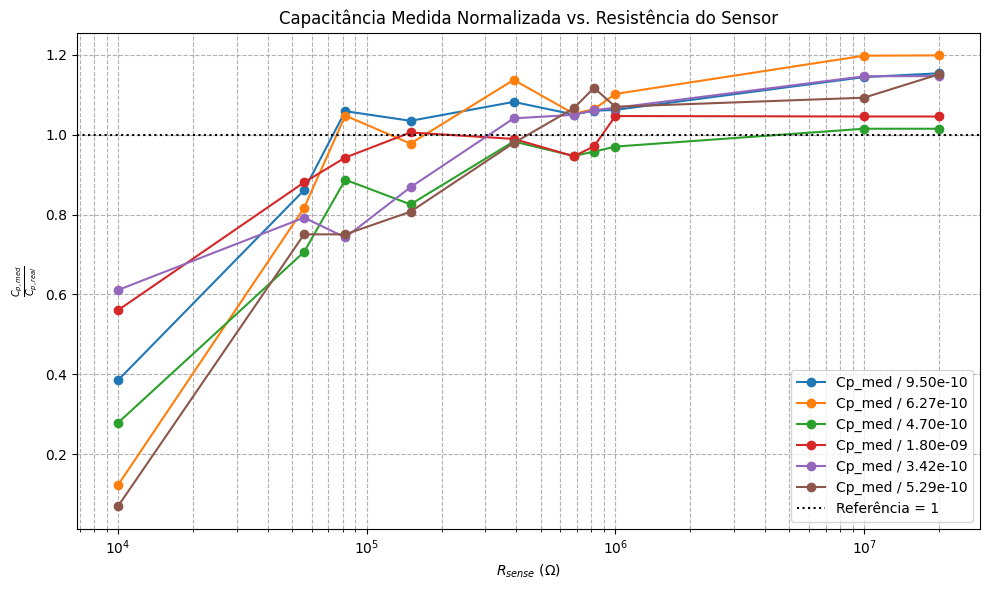

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Dados experimentais (eixo X, 10 valores)
rsense_experimental = np.array([10000, 56000, 82000, 150000, 390000, 680000, 820000, 1000000, 10000000, 20000000])

# Listas de valores de Cp_med_experimental antes da divisão (eixo Y, 11 valores cada)
cp_raw_lists = [
    [0.366 * 1e-9, 0.818 * 1e-9, 1.006 * 1e-9, 0.983 * 1e-9, 1.028 * 1e-9, 0.998 * 1e-9, 1.007 * 1e-9, 1.009 * 1e-9, 1.087 * 1e-9, 1.096 * 1e-9, 0.941 * 1e-9],
    [0.077 * 1e-9, 0.512 * 1e-9, 0.657 * 1e-9, 0.613 * 1e-9, 0.713 * 1e-9, 0.660 * 1e-9, 0.667 * 1e-9, 0.691 * 1e-9, 0.751 * 1e-9, 0.7515 * 1e-9, 0.640 * 1e-9],
    [0.131 * 1e-9, 0.332 * 1e-9, 0.417 * 1e-9, 0.388 * 1e-9, 0.462 * 1e-9, 0.445 * 1e-9, 0.450 * 1e-9, 0.456 * 1e-9, 0.477 * 1e-9, 0.477 * 1e-9, 0.394 * 1e-9],
    [1.009 * 1e-9, 1.585 * 1e-9, 1.697 * 1e-9, 1.810 * 1e-9, 1.781 * 1e-9, 1.703 * 1e-9, 1.747 * 1e-9, 1.884 * 1e-9, 1.882 * 1e-9, 1.882 * 1e-9, 1.246 * 1e-9],
    [0.209 * 1e-9, 0.271 * 1e-9, 0.254 * 1e-9, 0.297 * 1e-9, 0.356 * 1e-9, 0.359 * 1e-9, 0.363 * 1e-9, 0.365 * 1e-9, 0.392 * 1e-9, 0.3922 * 1e-9, 0.321 * 1e-9],
    [0.037 * 1e-9, 0.397 * 1e-9, 0.397 * 1e-9, 0.427 * 1e-9, 0.518 * 1e-9, 0.564 * 1e-9, 0.591 * 1e-9, 0.566 * 1e-9, 0.578 * 1e-9, 0.609 * 1e-9, 0.4785 * 1e-9],
]

# Divisores
divisors = [0.95E-9, 627.00E-12, 470.00E-12, 1.80E-9, 342.00E-12, 529.00E-12]

# Lista para armazenar os arrays de Cp_med_experimental calculados
Cp_med_experimental = []

# Calcular os valores de Cp_med_experimental
for i in range(len(cp_raw_lists)):
    # CORREÇÃO: Pegar apenas os 10 primeiros valores de cada lista para corresponder ao tamanho de rsense_experimental
    raw_data = np.array(cp_raw_lists[i][:10])
    Cp_med_experimental.append(raw_data / divisors[i])

# Plot
plt.figure(figsize=(10, 6))
for i in range(len(Cp_med_experimental)):
    plt.plot(rsense_experimental, Cp_med_experimental[i], marker='o', linestyle='-', label=f'Cp_med / {divisors[i]:.2e}')

plt.axhline(1, color='black', linestyle=':', label='Referência = 1')
plt.xscale('log')
plt.xlabel('$R_{sense} \\ (\\Omega)$')
plt.ylabel('$\\frac{C_{p,med}}{C_{p,real}}$')
plt.title('Capacitância Medida Normalizada vs. Resistência do Sensor')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.savefig('capacitancia_vs_resistencia.png')

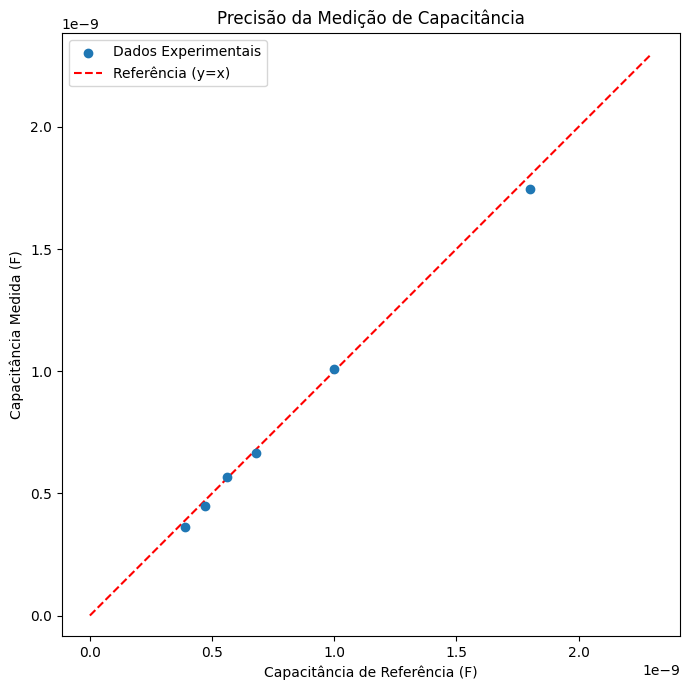

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Valores de referência (eixo x) e medidos (eixo y)
capacitancia_referencia = np.array([1.00E-9, 680E-12, 470E-12,1.8E-9, 390E-12, 560E-12])
capacitancia_medida = np.array([1.007E-9, 0.667E-9, 0.450E-9, 1.747E-9, 0.363E-9, 0.566E-9])

# Configura a figura para ter um aspecto quadrado
plt.figure(figsize=(7, 7))

# Plota os dados e a linha de referência ideal (y=x)
plt.scatter(capacitancia_referencia, capacitancia_medida, label='Dados Experimentais', zorder=5)
plt.plot([0, 2.3e-9], [0, 2.3e-9], 'r--', label='Referência (y=x)') # Linha de 0 ao máximo esperado

# Adiciona títulos e legenda
plt.xlabel("Capacitância de Referência (F)")
plt.ylabel("Capacitância Medida (F)")
plt.title("Precisão da Medição de Capacitância")
plt.legend()

# Força os eixos a terem a mesma escala para uma comparação visual correta
plt.axis('equal')
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()